In [1]:
import sys
sys.path.append('../')
import numpy as np
from IPython.display import HTML

from rover_simulator.world import World
from rover_simulator.rover import BasicRover, KalmanRover
from rover_simulator.history import *
from rover_simulator.navigation.localizer import NoisyLocalizer
from rover_simulator.navigation.controller import ConstantSpeedController

In [2]:
world = World()
world.read_objects("../rover_simulator/examples/environment_simple.txt")

In [3]:
# rover = BasicRover(
#     np.array([1.0, 1.0, 0.0]), 0.5,
#     localizer=NoisyLocalizer(),
#     controller=ConstantSpeedController(w=np.pi/32),
#     history=History()
# )
rover = KalmanRover(
    np.array([1.0, 1.0, 0.0]), 0.5,
    controller=ConstantSpeedController(w=np.pi/32),
    history=HistoryWithKalmanFilter()
)
world.append_rover(rover)

In [4]:
world.simulate(200)

  0%|          | 0/200 [00:00<?, ?it/s]

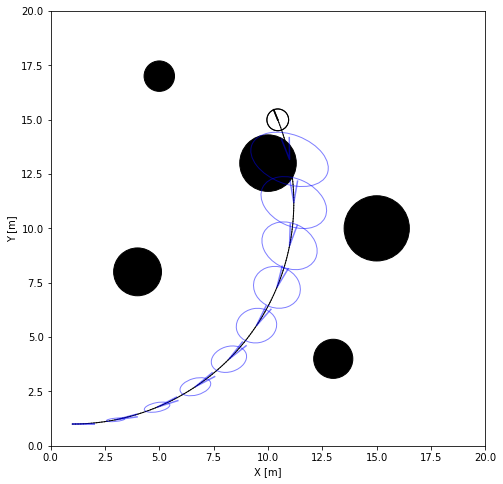

In [5]:
rover.history.draw(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles, enlarge_range=rover.r,
    draw_sensing_points_flag=False,
    draw_sensing_area_flag=False
)

In [6]:
rover.history.animate(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles,
    draw_sensing_points_flag=False,
    draw_sensing_area_flag=False,
    enlarge_range=rover.r
)
HTML(rover.history.ani.to_jshtml())

  0%|          | 0/200 [00:00<?, ?it/s]

In [7]:
# rover.history.save("./test.npz")